<a href="https://colab.research.google.com/github/raskutti/the-strokes/blob/main/album_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Strokes Album Analysis

TLDR:

- Is This It and The New Abnormal are standout albums by all metrics
- Albums tend to be worse on Side B than Side a

This colab analyzes album tracks from The Strokes, according to personal-preference song ratings.

Songs are rated from 1 to 6 (integers, inclusive) based on personal taste, and these are used to determine trends and overall album ratings.

**NOTE:** For simplicity and continuity, we assume that Is This It is a 12-track album, with New York City Cops as track 9 and When It Started as Track 10.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Read file from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
filepath = '/content/gdrive/MyDrive/Projects/The Strokes/Song Ratings.csv'

df_raw = pd.read_csv(filepath)

In [4]:
with pd.option_context('display.max_rows', None):
  display(df_raw)

,song,album,track_number,rating
0,Is This It,Is This It,1,6
1,The Modern Age,Is This It,2,5
2,Soma,Is This It,3,3
3,Barely Legal,Is This It,4,5
4,Someday,Is This It,5,6
5,"Alone, Together",Is This It,6,5
6,Last Nite,Is This It,7,5
7,Hard To Explain,Is This It,8,4
8,New York City Cops,Is This It,9,6
9,When It Started,Is This It,10,3


In [5]:
# Make a copy.
df = df_raw.copy()

In [6]:
album_order = {
    'Is This It': 1,
    'Room On Fire': 2,
    'First Impressions Of Earth': 3,
    'Angles': 4,
    'Comedown Machine': 5,
    'The New Abnormal': 6,
}

## Distribution of all songs

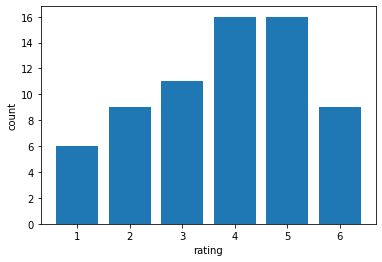

In [7]:
rating, count = np.unique(df.rating, return_counts=True)
plt.bar(rating, count, align='center')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

## Aggregate statistics by album

Find summary statistics by album:

- Mean
- Median
- Standard deviation
- Proportion of songs with 4+ ratings

In [8]:
def summarize_ratings(ratings):
  return {
      'mean_rating': np.mean(ratings),
      'median_rating': np.median(ratings),
      'std_rating': np.std(ratings),
      'prop_ratings_four_plus': sum(ratings >= 4) / len(ratings),
  }

df_album_summaries = df.groupby('album').rating.apply(summarize_ratings).unstack().reset_index()
df_album_summaries

,album,mean_rating,median_rating,std_rating,prop_ratings_four_plus
0,Angles,2.800000,2.5,1.536229,0.400000
1,Comedown Machine,3.272727,4.0,1.710444,0.545455
2,First Impressions Of Earth,3.642857,3.5,1.394230,0.500000
3,Is This It,4.583333,5.0,1.114924,0.750000
4,Room On Fire,4.090909,4.0,1.378705,0.636364
5,The New Abnormal,4.444444,4.0,0.831479,0.888889


In [9]:
df_album_summaries['album_number'] = df_album_summaries['album'].map(album_order)
df_album_summaries.sort_values('album_number', inplace=True)

### Best album by proportion of songs with 4+ rating: The New Abnormal

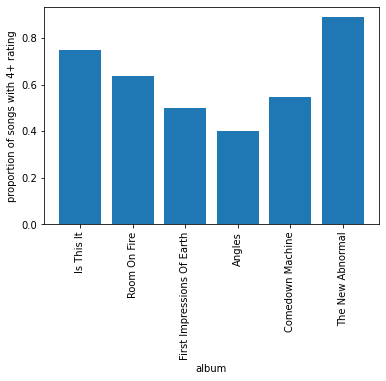

In [10]:
plt.bar(df_album_summaries.album, df_album_summaries.prop_ratings_four_plus)
plt.xticks(rotation=90)
plt.xlabel('album')
plt.ylabel('proportion of songs with 4+ rating')
plt.show()

### Best album by mean: Is This It

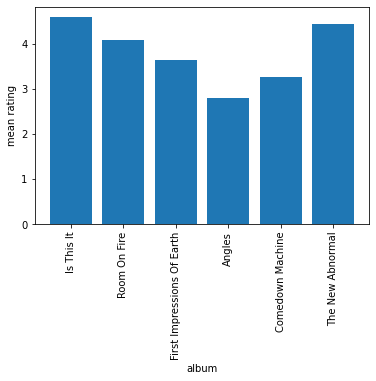

In [11]:
plt.bar(df_album_summaries.album, df_album_summaries.mean_rating)
plt.xticks(rotation=90)
plt.xlabel('album')
plt.ylabel('mean rating')
plt.show()

### Best album by median: Is This It

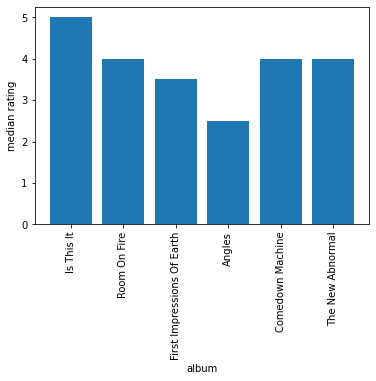

In [12]:
plt.bar(df_album_summaries.album, df_album_summaries.median_rating)
plt.xticks(rotation=90)
plt.xlabel('album')
plt.ylabel('median rating')
plt.show()

This is *clearly* a poor metric, since the median ranks The New Abnormal alongside Comedown Machine (higher than Room On Fire). Absurd. There aren't enough distinct categories in the "rating" for median to be an effective metric.

### Plot of mean and standard deviation

Below is a plot of each album's mean rating and one standard deviation above/below that mean.

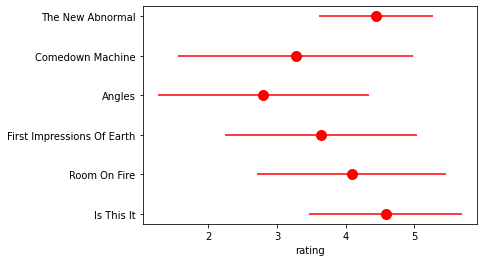

In [13]:
plt.scatter(df_album_summaries.mean_rating, df_album_summaries.album, color='red', s=100)
plt.hlines(df_album_summaries.album,
           df_album_summaries.mean_rating - df_album_summaries.std_rating,
           df_album_summaries.mean_rating + df_album_summaries.std_rating,
           color='red')
plt.xlabel('rating')
plt.show()

From this, we see that while Is This It is the best album by mean, The New Abnormal is a "tighter" album, in that all tracks are more consistently higher rated.

## Side A specialists?

For a while, I've wondered whether The Strokes are "Side A specialists", namely: Do their albums deteriorate later in the album?

Let's plot the song rating for each album.

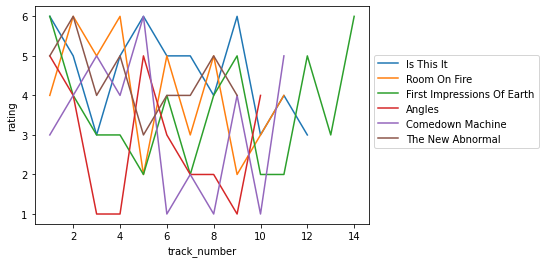

In [14]:
sns.lineplot(x='track_number', y='rating', hue='album', data=df)
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show()

There is so much noise here, the graph is difficult to digest. Let's calculate the correlation between the track number and the song rating. A negative value would imply that rating decreases later in the albums.

In [15]:
np.corrcoef(df.track_number, df.rating)[1, 0]

-0.22080949097477462

Let's partition each album into Side A and Side B. Since finding the actual vinyl sides is painful, we will assume that a track is on Side A if `track_number <= np.ceil(len(songs) / 2)`, since Side A generally contains at least as many songs as Side B.

In [16]:
df['album_side'] = ['A' if i else 'B' for i in df.track_number <= np.ceil(df.groupby('album').track_number.transform('max') / 2)]
df.head(12)

,song,album,track_number,rating,album_side
0,Is This It,Is This It,1,6,A
1,The Modern Age,Is This It,2,5,A
2,Soma,Is This It,3,3,A
3,Barely Legal,Is This It,4,5,A
4,Someday,Is This It,5,6,A
5,"Alone, Together",Is This It,6,5,A
6,Last Nite,Is This It,7,5,B
7,Hard To Explain,Is This It,8,4,B
8,New York City Cops,Is This It,9,6,B
9,When It Started,Is This It,10,3,B


Let's plot a histogram of ratings for Sides A and B.

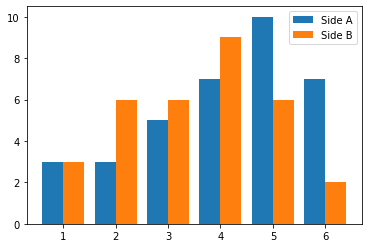

In [17]:
for side in ['A', 'B']:
  adj = -1 if side == 'A' else 1
  df_side = df[df.album_side==side]
  rating, count = np.unique(df_side.rating, return_counts=True)
  plt.bar(rating + adj*0.2, count, width=0.4, align='center', label='Side ' + side)

plt.legend()
plt.show()

This *does* seem to indicate that Side A tracks are in general better than Side B tracks. Now, we can do a one-sided t-test to see if ratings on Side B have a statistically significant lower mean than ratings on Side A.

In [18]:
stats.ttest_ind(df[df.album_side == 'A'].rating,
                df[df.album_side == 'B'].rating)

Ttest_indResult(statistic=1.7762539181748624, pvalue=0.08037106353038971)

This p-value is interesting, since it is not significant at 5% for a two-sided test, but *is* significant at 5% for the one-sided test for whether Side B is worse than Side A.